In [1]:
# import any packages you'll need to create dataframes and visualize your data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in the homepage_actions.csv file
df = pd.read_csv('homepage_actions.csv')

In [ ]:
# You have two groups: the control group and the experiment group.

# Use the data to determine the average rate at which people click on the call-to-action 
# button vs the ones who do not

# Check the reliability of your data by applying the Bootstrapping method based on the law of large numbers

In [109]:
df

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
...,...,...,...,...
8183,2017-01-18 09:11:41.984113,192060,experiment,view
8184,2017-01-18 09:42:12.844575,755912,experiment,view
8185,2017-01-18 10:01:09.026482,458115,experiment,view
8186,2017-01-18 10:08:51.588469,505451,control,view


In [113]:
df = df.drop('timestamp', axis=1)

In [123]:
df_click = df[df['action'] == 'click']
df_view = pd.DataFrame()

In [127]:
for id_ in list(df.id.unique()):
    if id_ not in list(df_click.id):
        df_view = df_view.append(df[df['id'] == id_])

In [128]:
df_view

,id,group,action
0,804196,experiment,view
1,434745,experiment,view
2,507599,experiment,view
3,671993,control,view
4,536734,experiment,view
...,...,...,...
8183,192060,experiment,view
8184,755912,experiment,view
8185,458115,experiment,view
8186,505451,control,view


In [129]:
df_click

,id,group,action
8,349125,experiment,click
12,601714,experiment,click
15,487634,experiment,click
17,468601,experiment,click
21,555973,experiment,click
...,...,...,...
8162,451198,control,click
8164,252195,control,click
8167,344770,experiment,click
8180,615849,experiment,click


In [130]:
4468 + 1860 * 2 # should equal 8188

8188

In [134]:
df_view.append(df_click).to_csv('homepage_actions1.csv', index=False)

In [135]:
df = pd.read_csv('homepage_actions1.csv')

In [136]:
df

,id,group,action
0,804196,experiment,view
1,434745,experiment,view
2,507599,experiment,view
3,671993,control,view
4,536734,experiment,view
...,...,...,...
6323,451198,control,click
6324,252195,control,click
6325,344770,experiment,click
6326,615849,experiment,click


In [140]:
df_exp = df.query("group == 'experiment'")
df_con = df.query("group == 'control'")

In [139]:
dict(df.action.value_counts())

{'view': 4468, 'click': 1860}

In [141]:
con_count = dict(df_con.action.value_counts())
exp_count = dict(df_exp.action.value_counts())

In [142]:
con_avg = con_count['click'] / (con_count['view'] + con_count['click'])
exp_avg = exp_count['click'] / (exp_count['view'] + exp_count['click'])
print(con_avg)
print(exp_avg)

0.2797118847539016
0.3097463284379172


In [143]:
# Bootstrapping

averages = []
for _ in range(10000):
    sample = df.sample(300, replace=False)
    sample_count = dict(sample.action.value_counts())
    averages.append(sample_count['click'] / (sample_count['view'] + sample_count['click']))

In [144]:
averages

[0.26666666666666666,
 0.27,
 0.33,
 0.31,
 0.26666666666666666,
 0.31333333333333335,
 0.32,
 0.3233333333333333,
 0.27,
 0.24666666666666667,
 0.32,
 0.30666666666666664,
 0.2833333333333333,
 0.31333333333333335,
 0.31666666666666665,
 0.2833333333333333,
 0.25333333333333335,
 0.31333333333333335,
 0.33,
 0.2866666666666667,
 0.2866666666666667,
 0.3566666666666667,
 0.2866666666666667,
 0.31333333333333335,
 0.26,
 0.31333333333333335,
 0.29333333333333333,
 0.2966666666666667,
 0.2866666666666667,
 0.29,
 0.27,
 0.29,
 0.25333333333333335,
 0.32,
 0.25333333333333335,
 0.2633333333333333,
 0.25666666666666665,
 0.31,
 0.29,
 0.24333333333333335,
 0.30333333333333334,
 0.31666666666666665,
 0.25333333333333335,
 0.32,
 0.28,
 0.3466666666666667,
 0.28,
 0.36666666666666664,
 0.28,
 0.3,
 0.26666666666666666,
 0.2966666666666667,
 0.32,
 0.25,
 0.30666666666666664,
 0.34,
 0.26666666666666666,
 0.2733333333333333,
 0.3466666666666667,
 0.26,
 0.31,
 0.2833333333333333,
 0.283333333

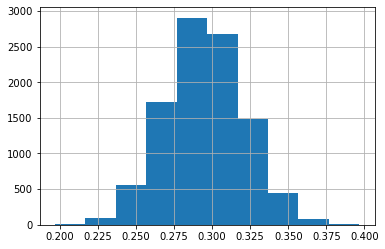

In [145]:
plt.grid(True)
plt.hist(averages);

In [149]:
x = round(np.percentile(averages, 2.5), 4)
y = round(np.percentile(averages, 97.5), 4)

In [150]:
print(f"We can say with 95% confidence that the average percent of people who click the call to action button is between {x*100} and {y*100}.")

We can say with 95% confidence that the average percent of people who click the call to action button is between 24.33 and 34.67.
